## 여행경로

### 1. 지문 이해 및 풀이 계획

#### 1) 배경지식
- 그래프(graph)
  - 정점(node)과 간선(edge)
  - 유향(directed) 그래프와 무향(undirected) 그래프
- 스택과 큐

#### 2) 깊이 우선 탐색 (DFS)
- 한 정점에서 인접한 모든 (아직 방문하지 않은) 정점을 방문하되,  
  각 인접 정점을 기준으로 깊이 우선 탐색을 끝낸 후 다음 정점으로 진행
- 스택을 이용하여 어느 정점에서 DFS를 하고 있는지를 기억하고 되돌아감

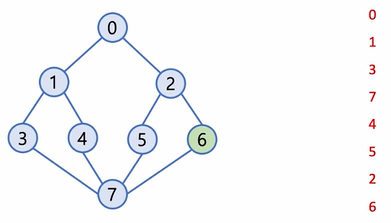

#### 3) 너비 우선 탐색 (BFS)
- 한 정점에서 인접한 모든 (아직 방문하지 않은) 정점을 방문하고,  
  방문한 각 인접 정점을 기준으로 (방문한 순서에 따라) 또다시 너비 우선 탐색을 행함
- 큐를 이용하여 어느 정점에서 BFS를 해야 하는지를 기록하고 진행함

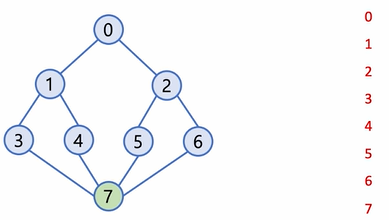

#### 4) 여행경로 문제

- 깊이 우선 탐색 (DFS)을 이용
  - 한 붓 그리기 (문제에서 보장)
  - 시작 정점은 언제나 "ICN"
  - 모든 정점 방문이 아니고, 모든 간선을 거쳐야 한다 (순서 결정이 목적)
  - 한 정점에서 택할 수 있는 간선이 두개 이상인 경우 알파벳 순서대로!  
    (단, 아래의 경우 무조건 알파벳 순서대로 하면 안 된다)

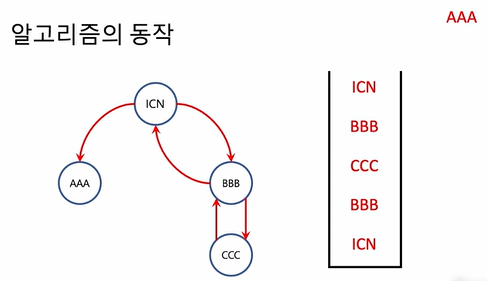  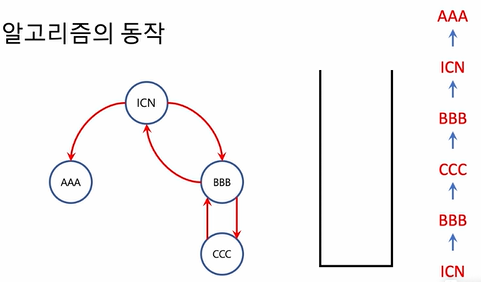

- 알고리즘의 설계
  - 스택을 이용하여 재귀적인 "한 붓 그리기" 문제로 DFS을 이용하여 해결


### 2. 강사의 풀이

- 그래프의 표현
  - 사전을 이용하여 각 공항에서 출발하는 항공권의 집합을 표현
  - 순서 존재 : 집합 -> 리스트로 표현
  - 뒤에서부터 제거하는 것이 효율적 : 알파벳 역순으로 정렬

- 강의 듣기 전 Try

In [ ]:
def solution(tickets):

    # 티켓 기록
    data = {}
    for t in tickets:
        if t[0] in data:
            data[t[0]].append([t[1],False])
        else:
            data[t[0]] = [[t[1],False]] 
        if t[1] not in data:
            data[t[1]] = []

    # 티켓 알파벳 순서 정렬
    for i in data:
        data[i].sort()

    def dfs(data, x, answer):
        x[1] = True
        answer.append(x[0])

        for i,j in enumerate(data[x[0]]):
            if j[1] == False:
                dfs(data, data[x[0]][i], answer)

        if all(x[1] == True for value in data.values() for x in value):
            return answer

    answer = dfs(data, data["ICN"][0], [])
    answer.insert(0, "ICN")
    return answer

- 강사의 풀이

In [ ]:
def solution(tickets):
    routes = {}
    for t in tickets:
        # .get(a,b) : a가 있다면 a의 values, 없다면 b
        routes[t[0]] = routes.get(t[0], []) + t[1]
    for r in routes:
        routes[r].sort(reverse=True)
    
    stack = ["ICN"]
    path = [] # 경로 저장 리스트

    while len(stack) > 0:
        top = stack[-1] # 현재 있는 공항
        # top이 routes에 없거나 (해당 공항에서 출발하는 티켓 없는 경우)
        # 또는 routes에서 top 길이가 0인 경우 (해당 공항에서 출발하는 티켓을 모두 사용한 경우)
        if top not in routes or len(routes[top])==0:
            path.append(stack.pop())
        else:
            stack.append(routes[top][-1]) 
            routes[top] = routes[top][:-1]

    return path[::-1] #역순 정렬

- 알고리즘의 복잡도
  - 스택 삽입 및 삭제 (티켓의 개수), routes 정렬에 따라 시간복잡도↓ => O(nlogn)
  - while문의 시간 복잡도 => 한 단계에서 상수복잡도로 전체는 linear